In [0]:
%matplotlib inline

# Assignment 1

**DUE: Monday April 13, 2020 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [0]:
NAME = "Bhishek Manek"
STUDENT_ID = "1566863"

## Problem 1 -  Bayes' Theorem

Sadly, many physicians and almost all (non-mathematician) patients would get this problem wrong!

Suppose that a certain form of cancer has a test that correctly detects cancer (if one has it) 99.5% of the time. The prevalence of the cancer in the general population is 1 person in 14,000. Also, if one doesn't have cancer, the test will incorrectly say that one does, $\frac{1}{2}$% of the time (one out of 200).

NOTE: For each of the following questions, please give each answer to at least 2 significant digit accuracy. To accomplish this, don't round off your results until the very last step of each calculation.

### a. What's the probability that someone picked at random has this form of cancer?

$7.1 \times 10^{-5}$

### b. If you take the test and it comes out positive, what is the probability that you have this form of cancer?

$1.4 \times 10^{-2}$

### c. If you take the test and it comes out negative, what is the probability that you have this form of cancer?

$3.6 \times 10^{-7}$

## List and Dictionary Comprehensions

In Python, there is a very useful construct called list comprehensions, which in Python 3 also can be used to construct dictionaries.

For one simple example, we can generate a list of random integers using Numpy's randint function.  We can then generate a list of the cubes of those numbers. 

In [73]:
from numpy.random import randint, seed

# Set the seed so the same random numbers will be generated.
seed(42)

# Create a list of 22 simulated die casts (i.e., 22 random numbers from 1 to 6).
number_list = [randint(1, 7) for _ in range(22)]
print(number_list)

# Now create a list of the cubes of those of the above integers that are less than 5.
cubed = [n**3 for n in number_list if n < 5]
print(cubed)

[4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4, 5, 1]
[64, 27, 8, 27, 27, 27, 64, 27, 8, 64, 8, 64, 1]


## Problem 2 -  List Comprehensions

### (a) Use list comprehensions to create a list of all the indices of the 2's in the number_list you generated above.

In [74]:
two_ind_list = [i for i in range(len(number_list)) if number_list[i] == 2]
two_ind_list

[5, 14, 18]

### (b) Generate a list of the sum of the numbers that come up when a pair of dice is cast 22 times.

In [75]:
seed(117)   # DON'T CHANGE

sums = None
number_list_1 = [randint(1,7) for _ in range(22)]
number_list_2 = [randint(1,7) for _ in range(22)]

sums = [number_list_1[i]+number_list_2[i] for i in range(len(number_list_2))]
print(sums)

[2, 3, 8, 9, 8, 10, 8, 10, 2, 9, 7, 6, 8, 6, 5, 4, 5, 10, 7, 5, 7, 8]


### (c) Generate a list of the sum of the numbers that come up when a pair of dice is cast 100000 times. Find the mean and standard deviation of these numbers.

In [76]:
from numpy import mean, std

seed(111)   # DON'T CHANGE

number_list_1 = [randint(1,7) for _ in range(100000)]
number_list_2 = [randint(1,7) for _ in range(100000)]

sums = [number_list_1[i] + number_list_2[i] for i in range(100000)]  

print('mean =', mean(sums), '    std =', std(sums))

mean = 7.02026     std = 2.4179184296414964


## Monte Carlo Simulations

Monte Carlo simulations can yield numeric solutions to probability problems that aren't possible to solve analytically. These simulations are also often easy to code up, and so also provide a way to check one's calculations for problems that amenable to analysis. So this is an important technique to become familiar with.

Basically, one creates a simulation of the situation, and runs many trials that allow one to estimate the probabilities by computing proportions. 

First we give you an example of a Monte Carlo simulation, and then you'll solve such a problem yourself.

### Example

If you throw a die 100 times, with what probability are you likely to see the subsequence {2, 4, 6} appear?

Be patient, this may take a few minutes to run, but notice how straightforward the coding is. The simplicity of the Monte Carlo method makes it very powerful.

In [77]:
from numpy.random import randint
import numpy as np

seed(17)   # DON'T CHANGE

num_tosses = 100    # tosses per trial
num_trials = 100000

# This sets the feedback interval so we know the program hasn't crashed.
feedback = int(np.round(num_trials / 10))

num_seq_found = 0   # to count the number of target subsequences detected
for t in range(1, num_trials + 1):
    
    # To see the progress.
    if t % feedback == 0:  
        print(np.round(100 * t / num_trials, 1), '%  complete:   prob =', num_seq_found / t)
        
    # Roll the die num_tosses times.
    trial = [randint(1, 7) for _ in range(num_tosses)]
    # Find the indices of all the 2s.
    twos = [i for i in range(num_tosses) if trial[i] == 2]
    
    # Search to see if after each 2 we have a 4 followed by a 6.
    for j in twos:
        if j < num_tosses - 2 and trial[j] == 2 and trial[j + 1] == 4 and trial[j + 2] == 6:
            # We've found the target subsequence.
            num_seq_found += 1
    
print('Probability of this subsequence =', num_seq_found / num_trials)

10.0 %  complete:   prob = 0.4509
20.0 %  complete:   prob = 0.45315
30.0 %  complete:   prob = 0.4488
40.0 %  complete:   prob = 0.448225
50.0 %  complete:   prob = 0.44994
60.0 %  complete:   prob = 0.4504166666666667
70.0 %  complete:   prob = 0.4519
80.0 %  complete:   prob = 0.451175
90.0 %  complete:   prob = 0.4522888888888889
100.0 %  complete:   prob = 0.45287
Probability of this subsequence = 0.45287


This is often a bit of a waiting game, though by exploiting parallelism one can speed it up a bit.

Running the above simulation 5 times previously, we obtained  0.4561, 0.45562, 0.45296, 0.45154, and 0.45529. One can see that the true probability is about 0.454 (their average), though more trials will be needed to obtain a more accurate estimate.  We haven't proved anything, yet we have a very good idea of the true probability. This is a good reality check for many probability calculations. 

The above can easily be calculated precisely. Any particular sequence of three tosses that come up 2,4,6 has probability $\left(\frac{1}{6}\right)^3$, and there are 98 possible starting points for the sequence, so there are 98 ways in which the target sequence could be achieved. So the probability is:

$$\left(\frac{1}{6}\right)^3\cdot 98 = 0.45370370\dots~\dot{=}~0.454$$

One can use Monte Carlo Simulations for far more than just solving probability problems. 

## Problem 3  -  Monte Carlo Simulation

Consider the following game. Randomly pick three balls (without replacement) from an urn containing 60 red balls, 30 green balls, and 10 blue balls. If the majority of balls is red then roll dice and you win an amount equal to the sum of the dice. If the majority of balls isn't red, than you lose the sum of the dice roll. If you had to pay $2 to play this game, about how much would you expect to win (or lose)? Please round off your answer to the nearest cent.

In [79]:
import numpy as np
import random
from numpy.random import shuffle, randint, seed

seed(213)   # DON'T CHANGE
num_trials = 1000000 # DON'T CHANGE

### YOUR CODE HERE ###
#Initialize mean winnings and total winnings
mean_winnings = 0
total_winnings = 0
for i in range(num_trials):
  list_balls = ['R']*60 + ['G']*30 + ['B']*10     # Create a list with 60 Red, 30 Green and 10 Blue balls
  np.random.shuffle(list_balls)
  picks=[]
  count=0
  for j in range(3):                              #Pick 3 balls and put them in 'picks'
    k=list_balls.pop()
    picks.append(k)
    list_balls.remove(k)
  for toss in picks:                              # Count the number of 'R' balls in the balls picked 
    if 'R' in toss:
      count=count+1
    else:
      continue
  # Initialize winnings in the current trial
  trial_winnings=0
  if (count >= 2):                                # Toss dice and add or subtract winnings
    first_die = randint(1,7)
    second_die = randint(1,7)
    trial_winnings = trial_winnings + (first_die + second_die)
  else:
    first_die = randint(1,7)
    second_die = randint(1,7)
    trial_winnings = trial_winnings - (first_die+second_die)
  total_winnings=total_winnings+trial_winnings      # Calculate total winnings in all the trials
print('Total winnings =',total_winnings)
mean_winnings = (total_winnings - 2*num_trials)/num_trials      # Calculate net winnings per trial (mean winnings)
print('Mean winnings =',mean_winnings)

Total winnings = 2096579
Mean winnings = 0.096579


mean winnings = 9 cents

## Problem 4 - Data Exploration

When a data scientist first encounters a new dataset, the first step is data exploration. The dataset we'll be using is derived from the Heart database from the UCI Machine Learning Repository.

In [80]:
# Useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read in the Data
This is much easier when you have the data on your own hard drive! Just run the next couple of code blocks. You'll have to paste your authorization code at one point...


In [81]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [83]:
downloaded = drive.CreateFile({'id':"1qF_Ees7ETr5BiPnHTabyeIH1KQVkViUK"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Heart.csv')        # replace the file name with your file

# Finally we can actually read in the data.
data = pd.read_csv('Heart.csv')

# How many rows and columns are in this dataset?
data.shape

(306, 15)

### Data Dictionary

Look for a data dictionary whenever you explore a new dataset. This is a codebook that tells you what each data item represents. The following is a data dictionary for this dataset, which is derived from one in the UCI Machine Learning Dataset Repository.

Age: The person's age in years

Sex: The person's sex (1 = male, 0 = female)

ChestPain: The chest pain experienced <br>
.............typical angina  <br>
.............atypical angina <br>
.............non-anginal pain  <br>
.............asymptomatic

RestBP: The person's resting blood pressure (mm Hg on admission to the hospital)

Chol: The person's cholesterol measurement in mg/dl

Fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

RestECG: Resting electrocardiographic measurement <br>
.............0: normal <br>
.............1: having ST-T wave abnormality <br>
.............2: showing probable left ventricular hypertrophy by Estes' criteria

MaxHR: The person's maximum heart rate achieved

ExAng: Exercise induced angina (1 = yes; 0 = no)

Oldpeak: ST depression induced by exercise relative to rest <br>
..............('ST' relates to positions on the ECG plot.)

Slope: the slope of the peak exercise ST segment <br>
...........1: upsloping <br>
...........2: flat <br>
...........3: downsloping

Ca: The number of major vessels (0-3)

Thal: A blood disorder called thalassemia <br>
...........normal <br>
...........fixed <br>
...........reversable

AHD: Heart disease ('No', 'Yes') -  The target we would like to predict.

In [84]:
# Show the first few rows of the data.
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [85]:
# This command prints out information about the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


The above output can help you to see how much missing data is in the dataset. We know there are 306 rows in this dataset, so a Non-Null Count less than 306 indicates missing values. 

What to do about missing values is very good question. Sometimes one replaces such missing values with the mean of all the values that are present for this variable. But to keep things simple here we will simply delete any rows with missing data.

In [86]:
# Drop any rows with missing data
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   Age         300 non-null    int64  
 2   Sex         300 non-null    int64  
 3   ChestPain   300 non-null    object 
 4   RestBP      300 non-null    int64  
 5   Chol        300 non-null    int64  
 6   Fbs         300 non-null    int64  
 7   RestECG     300 non-null    int64  
 8   MaxHR       300 non-null    int64  
 9   ExAng       300 non-null    int64  
 10  Oldpeak     300 non-null    float64
 11  Slope       300 non-null    int64  
 12  Ca          300 non-null    float64
 13  Thal        300 non-null    object 
 14  AHD         300 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.5+ KB


Now we have 300 rows, none of which have any missing data.  

Another useful Pandas dataframe method is describe(). The describe method gives summary statistics for each column, which can help you to identify outliers.

In [87]:
# The describe method of a Pandas dataframe yields much useful information.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,152.216667,55.036667,0.676667,139.423333,247.073333,0.143333,0.993333,150.076667,0.326667,1.130333,1.610000,0.670000
std,88.235071,13.237299,0.468530,134.670429,52.367188,0.350998,0.994948,27.094362,0.469778,1.645887,0.621171,0.936674
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,75.750000,47.750000,0.000000,120.000000,211.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000
50%,151.500000,56.000000,1.000000,130.000000,242.500000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,228.250000,61.000000,1.000000,140.000000,276.250000,0.000000,2.000000,166.250000,1.000000,1.800000,2.000000,1.000000
max,306.000000,222.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Outliers are values far removed from the other data values, and are usually typos or other errors. Cleaning a dataset requires removing outliers.  Looking at the above, notice that the maximum age is 222, clearly an error. We'll remove any ages that are more than 4 standard deviations from the mean.

To accomplish this, we'll make a new column called AgeZ to hold the z-transformed values in the Age column.

In [88]:
data['AgeZ'] = np.abs((data['Age'] - data['Age'].mean()) / data['Age'].std())

# Delete any rows for which AgeZ is greater than 4.
data = data[data.AgeZ <= 4]

# Cleanup - delete the z-tranform column since we don't need it any more.
data = data.drop(columns=['AgeZ'])

# Let's take another look.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,151.705686,54.478261,0.675585,139.387960,247.424749,0.143813,0.996656,150.571906,0.324415,1.124749,1.605351,0.672241
std,87.937251,9.052904,0.468941,134.894801,52.099449,0.351488,0.994948,25.743782,0.468941,1.645797,0.616962,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,276.500000,0.000000,2.000000,166.500000,1.000000,1.700000,2.000000,1.000000
max,306.000000,77.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Notice that now the Age column is much more reasonable.  

### Problem 4 (a)

Perform the same process to eliminate any extreme outliers (more than 4 standard deviations from the mean) for RestBP, MaxHR, and the Oldpeak variables. Delete those exta columns after you have removed the outliers.

In [89]:
### YOUR CODE HERE ###
data['RestBPZ'] = np.abs((data['RestBP'] - data['RestBP'].mean()) / data['RestBP'].std())
data = data[data.RestBPZ <= 4]
data = data.drop(columns=['RestBPZ'])

data['MaxHRZ'] = np.abs((data['MaxHR'] - data['MaxHR'].mean()) / data['MaxHR'].std())
data = data[data.MaxHRZ <= 4]
data = data.drop(columns=['MaxHRZ'])

data['OldpeakZ'] = np.abs((data['Oldpeak'] - data['Oldpeak'].mean()) / data['Oldpeak'].std())
data = data[data.OldpeakZ <= 4]
data = data.drop(columns=['OldpeakZ'])


# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,151.294915,54.532203,0.681356,131.637288,247.728814,0.145763,0.996610,149.586441,0.328814,1.036271,1.596610,0.671186
std,87.248284,9.066167,0.466742,17.733303,51.919492,0.353468,0.994879,23.012681,0.470580,1.130351,0.614442,0.931507
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.500000,48.000000,0.000000,120.000000,211.500000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,226.500000,61.000000,1.000000,140.000000,276.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,302.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000


### Data Visualization

Sometimes it's useful to look at a pairwise plot of all the variables. Below we do this for all but the first column. Be patient, this takes a minute to complete. Notice that the main diagonal has histogram plots for each variable, which gives you a sense of the distribution of values of each variable.

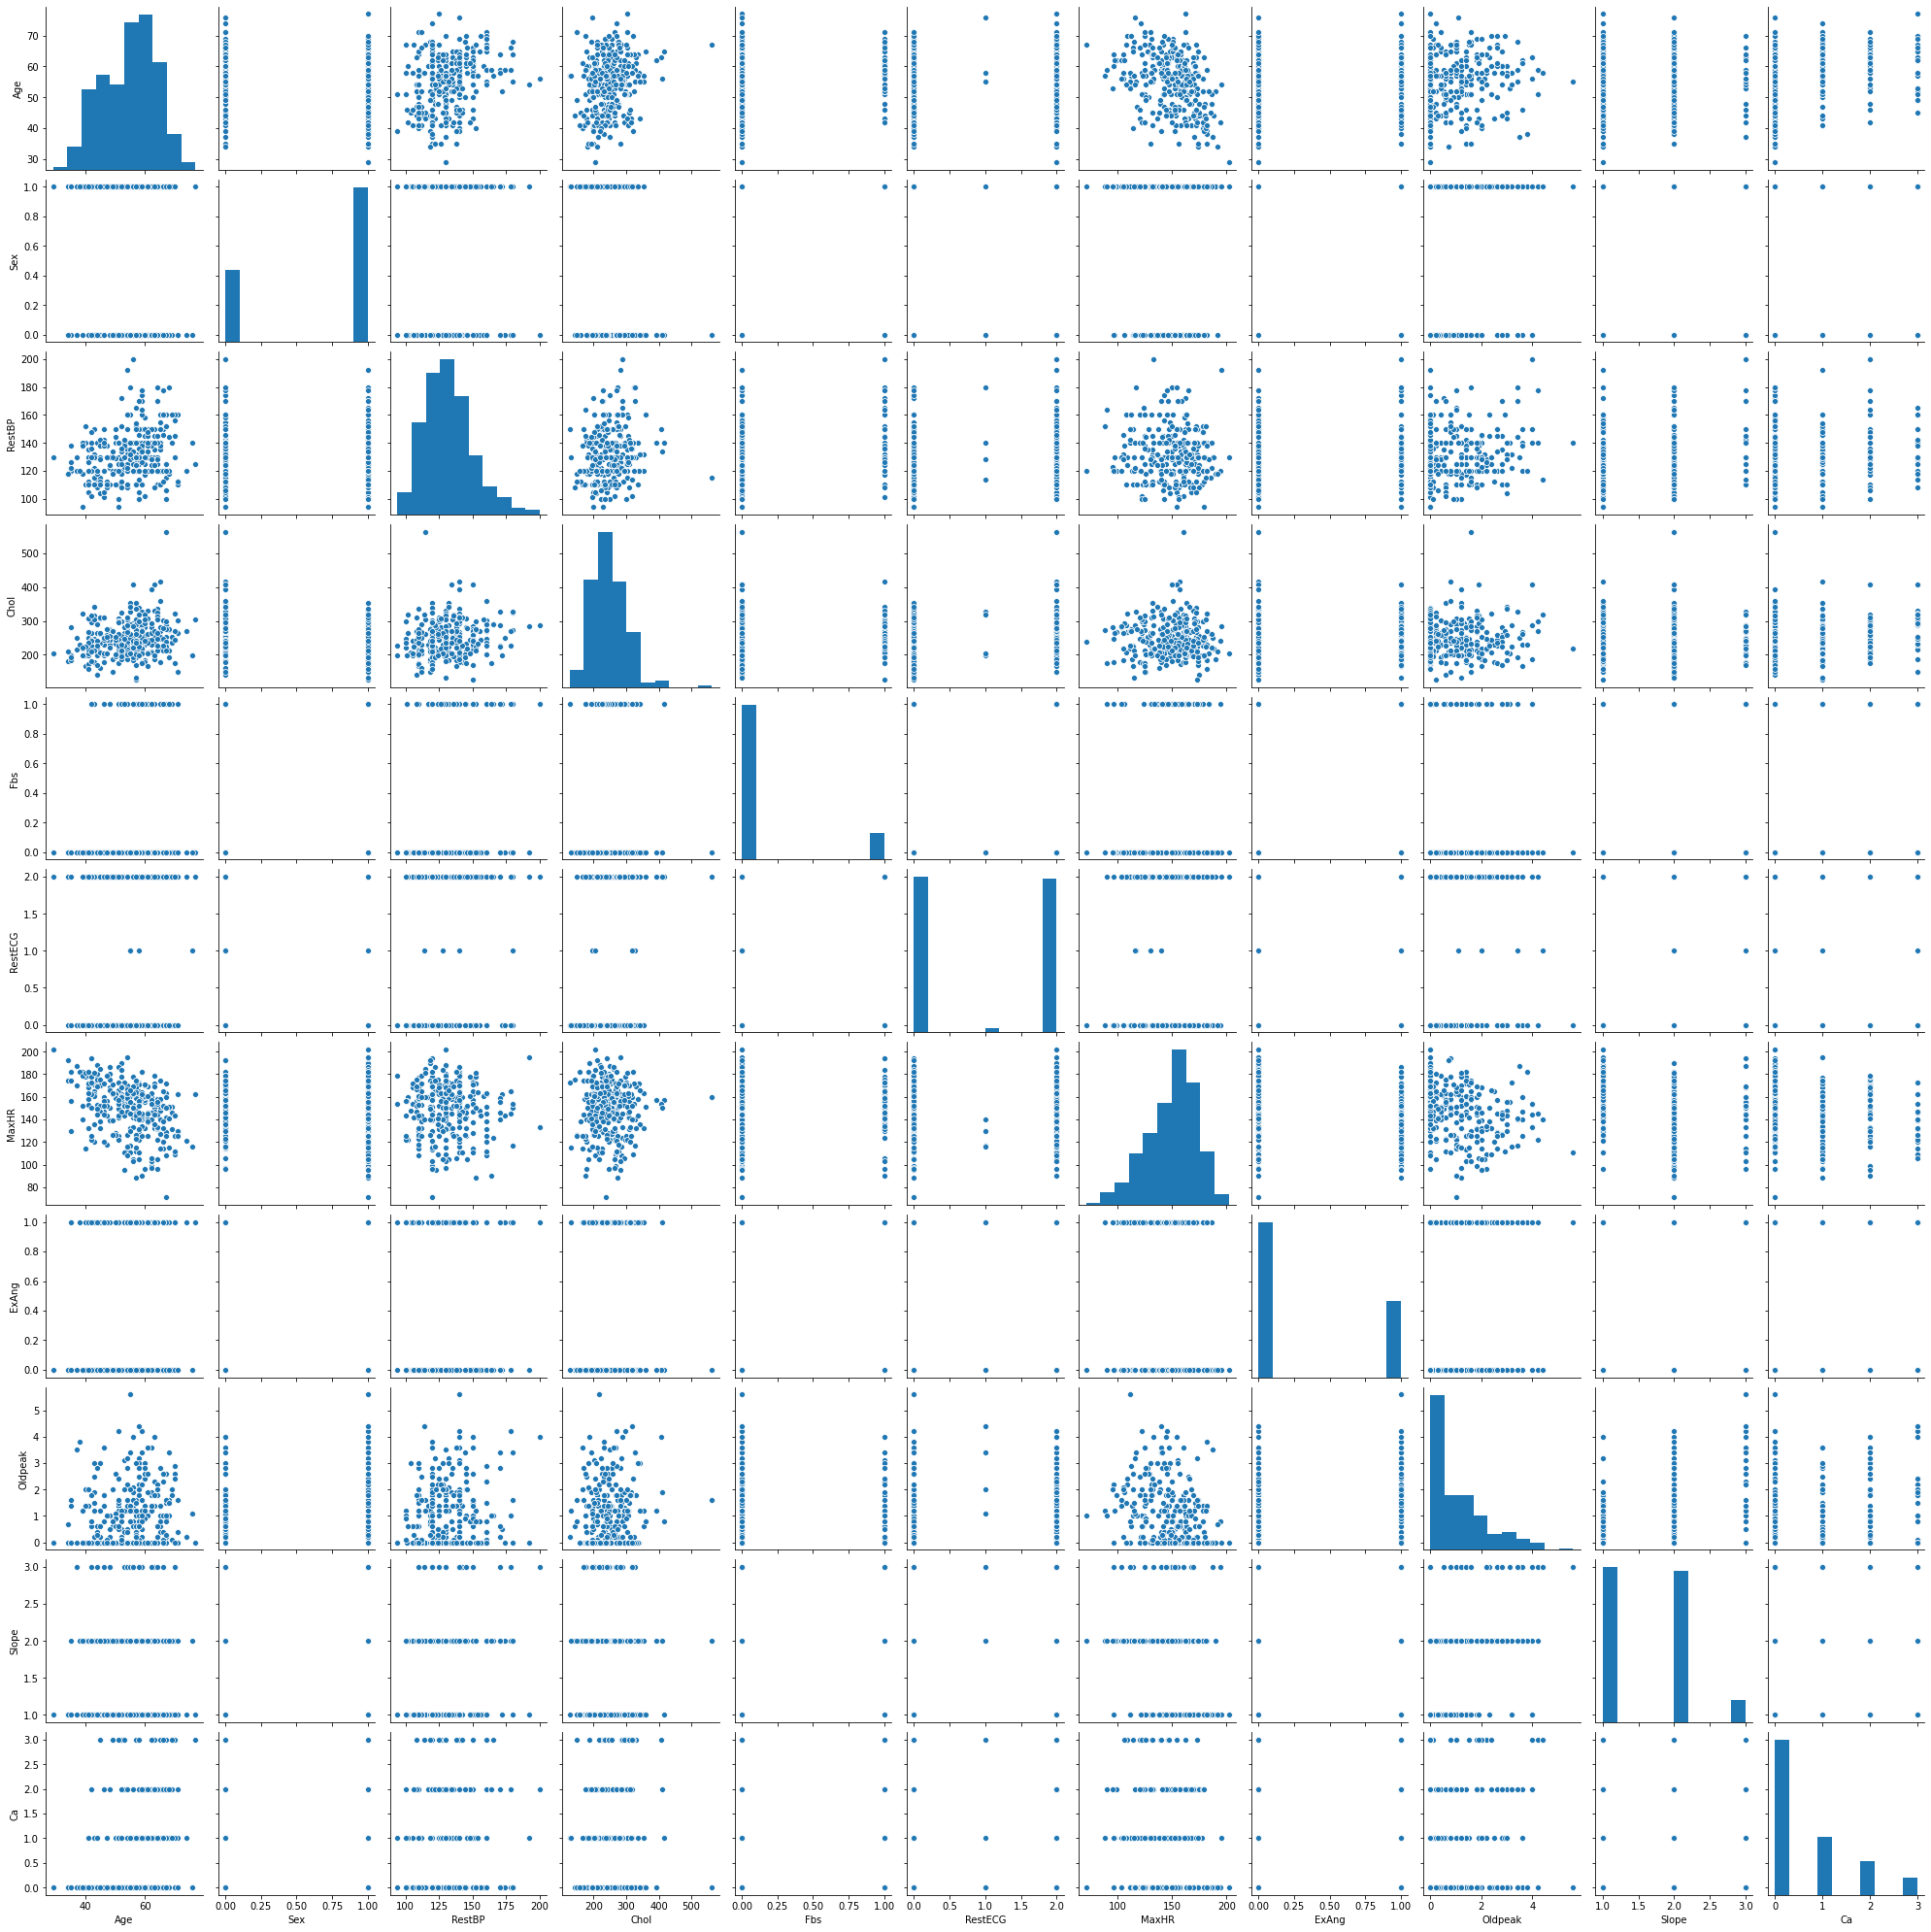

In [90]:
# Make a pairplot of all the variables (columns), excepting the first column.
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(data.drop(columns='Unnamed: 0'))

Let's look at a larger plot of the patient age distribution for the patients in this dataset.

Text(0.5, 1.0, 'Age Distribution')

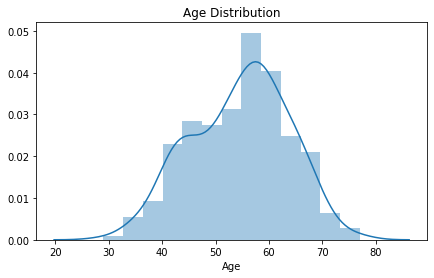

In [91]:
# Plot the patient age distribution.
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Age'])
plt.title('Age Distribution')

### Problem 4 (b)

Plot the distribution of patient cholesterol levels.

Text(0.5, 1.0, 'Cholestrol Level Distribution')

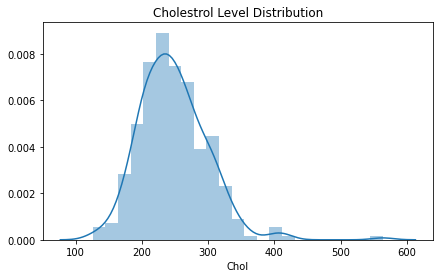

In [92]:
### YOUR CODE HERE ###
plt.rcParams['figure.figsize'] = (7,4)
sns.distplot(data['Chol'])
plt.title('Cholestrol Level Distribution')

### Data Normalization

We've already seen how the z-transform can be used to rescale values. We used this to help eliminate outliers, but such transforms can also be useful prior to applying machine learning algorithms, and often improves the algorithms performance. 

Another common transform is to map all the variable values into the interval $[0,1]$, via the transform:

$$x \to  \frac{x - \min}{\max - \min}$$

For example, below we create a new column mapping all ages into the interval $[0,1]$.

In [93]:
# Create a new column, NewAge, to hold the z-transformed Age variable.
data['NewAge'] = (data['Age'] - data['Age'].min())/(data['Age'].max() - data['Age'].min())

# Take a look at our z-transformed age column.
data['NewAge']

0      0.708333
1      0.791667
2      0.791667
3      0.166667
4      0.250000
         ...   
297    0.583333
298    0.333333
299    0.812500
300    0.583333
301    0.583333
Name: NewAge, Length: 295, dtype: float64

In [0]:
# We don't need this column, so we delete it. (It was just to show you how to do this.)
data = data.drop(columns=['NewAge'])

### Problem 4 (c)

Map the minimum to 0 and maximum to 1 for the RestBP, Chol, and MaxHR columns. Don't create new columns, just replace the existing ones with the transformed data.

In [96]:
### YOUR CODE HERE ###
def normalize_col(col):
  return (col - col.min())/(col.max()-col.min())

data['RestBP'] = normalize_col(data['RestBP'])
data['Chol'] = normalize_col(data['Chol'])
data['MaxHR'] = normalize_col(data['MaxHR'])

# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,151.294915,54.532203,0.681356,0.355069,0.277920,0.145763,0.996610,0.599896,0.328814,1.036271,1.596610,0.671186
std,87.248284,9.066167,0.466742,0.167295,0.118538,0.353468,0.994879,0.175669,0.470580,1.130351,0.614442,0.931507
min,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,75.500000,48.000000,0.000000,0.245283,0.195205,0.000000,0.000000,0.473282,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,0.339623,0.267123,0.000000,1.000000,0.625954,0.000000,0.800000,2.000000,0.000000
75%,226.500000,61.000000,1.000000,0.433962,0.343607,0.000000,2.000000,0.725191,1.000000,1.600000,2.000000,1.000000
max,302.000000,77.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.600000,3.000000,3.000000


### Problem 4 (d)

### Converting Categorical Data to Numeric Values

It's frequently useful to convert categorical (non-numeric) values to numeric ones. The last variable in the data frame, AHD, has categorical values 'No' if the patient has no heart disease, and 'Yes' if they do. Convert these values to 0 for 'No' and 1 for 'Yes'.

In [97]:
### YOUR CODE HERE ###

data.AHD.replace(('Yes','No'), (1,0), inplace=True)
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,normal,0


### One-Hot-Encoding

One-hot-encoding is another often used way of converting categorical data to numeric. For example, instead of the categories 'cold', 'warm', 'hot', we form a seperate column for each of these attributes, so that what was represented as 'cold' is now $[1,0,0]$ and what was 'hot' is now $[0,0,1]$.  There is a built in command for doing this in the sklearn package.

In [98]:
# Current dataframe column names.
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [99]:
# Concatentate new one-hot encodings with the original dataframe.
data = pd.concat([data, pd.get_dummies(data['Thal'], prefix='Thal')], axis=1)

# now drop the original 'Thal' column (you don't need it anymore)
data.drop(columns=['Thal'], inplace=True)

data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,typical,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0
1,2,67,1,asymptomatic,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0
2,3,67,1,asymptomatic,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1
3,4,37,1,nonanginal,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0
4,5,41,0,nontypical,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0


Notice how the 'Thal' column has been replaced by its one-hot-encoding.

Create a one-hot-encoding for the ChestPain column, just as we did above for the Thal column, deleting the original column as before.

In [100]:
### YOUR CODE HERE ###
data = pd.concat([data, pd.get_dummies(data['ChestPain'], prefix='ChestPain')], axis=1)

# now drop the original 'Thal' column (you don't need it anymore)
data.drop(columns=['ChestPain'], inplace=True)

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0,0,0,0,1
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0,1,0,0,0
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1,1,0,0,0
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0,0,1,0,0
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0,0,0,1,0


### Feature Engineering ###

Feature engineering is central to much of machine learning. Traditionally such features needed to be hand crafted, which is as much an art as it is engineering. One of the huge advantages of neural networks over traditional machine learning techniques is that neural networks can learn optimal features.

### Problem 4 (e)

Create a new column (feature) called AgeC, which will be the product of the patient's age and the patient's cholesterol level. 

In [101]:
### YOUR CODE HERE ###
data['AgeC'] = data['Age']*data['Chol']

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,AgeC
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,3,0.0,0,1,0,0,0,0,0,1,15.390411
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,2,3.0,1,0,1,0,1,0,0,0,24.474886
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,2,2.0,1,0,0,1,1,0,0,0,15.755708
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,3,0.0,0,0,1,0,0,1,0,0,10.474886
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,1,0.0,0,0,1,0,0,0,1,0,7.301370


###  Balanced or Unbalanced Classes

For this dataset, one variable that we might like to predict is the presence of heart disease, the AHD column, using all the other columns. Some datasets are highly imbalanced.  Suppose that 95% of a set of patients were healthy, with only 5% having heart disease. A machine learning model can attain 95% accuracy by simply ALWAYS predicting no heart disease. It sounds like a fairly accurate model, but it would miss predicting any heart disease! 

There are techniques for dealing with this, but first we have to ascertain if our data is unbalanced. Let's see.

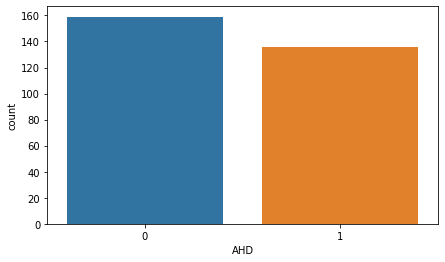

In [102]:
# Plot the target attribute AHD to check to see if the classes are balanced.
sns.countplot(data['AHD'])

These are fairly balanced, so we are good to go!